## Trabalho Computacional I
___
### Projeto 2: Butterworth por Transformação Bilinear
ENGC63 - 2023.1

**Discentes:** Gabriel S. de Andrade e Fábio B. Braga Santana

In [346]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftfreq
from scipy.io.wavfile import read, write
from IPython.display import display, Math, Audio

In [347]:
N = 6
fs = 44100
wc = 2 * np.pi / 3
T = 1 / fs
fc = round(wc * fs / (2 * np.pi))
Wc = 2 * np.pi * fc

print(f"Ordem do filtro: {N}")
print(f"Frequência de corte: {fc} Hz")
print(f"Frequência angular de corte: {Wc} rad/s")
print(f"Período de amostragem: {T} s")
print(f"Frequência de amostragem: {fs} Hz")
print(f"Amostras por período: {fs/fc}")

# Design analog Butterworth filter using signal.butter function
b, a = signal.butter(N, Wc, "lowpass", analog="True", output="ba")
analog_filter = signal.lti(b, a)

# print(f"Coeficientes do filtro analógico: {a}, {b}")

# Perform bilinear Transformation
discrete_filter = signal.dlti(*signal.bilinear(b, a, fs=fs))

# Compute frequency response of the filter using signal.freqz function
wz, hz = signal.freqz(discrete_filter.num, discrete_filter.den, worN=fs)
ws, hs = signal.freqs(analog_filter.num, analog_filter.den, worN=fs * wz)

Ordem do filtro: 6
Frequência de corte: 14700 Hz
Frequência angular de corte: 92362.82401553991 rad/s
Período de amostragem: 2.2675736961451248e-05 s
Frequência de amostragem: 44100 Hz
Amostras por período: 3.0


### Polos do filtro digital

Polos do filtro digital: [-0.03661765+0.7666792j  -0.03661765-0.7666792j  -0.02700781+0.41395565j
 -0.02700781-0.41395565j -0.02345409+0.13158131j -0.02345409-0.13158131j]

Zeros do filtro digital: [-1.00316869+0.j         -1.00158384+0.0027442j  -1.00158384-0.0027442j
 -0.9984156 +0.00274323j -0.9984156 -0.00274323j -0.99683243+0.j        ]


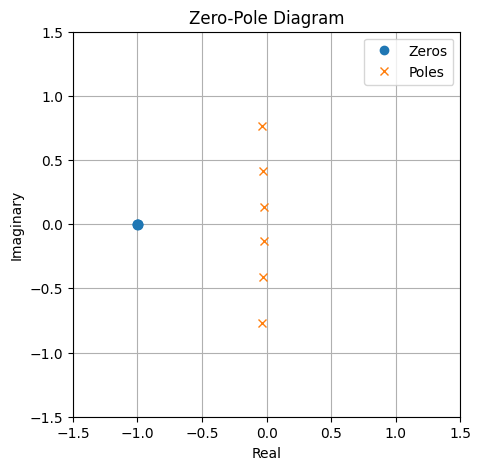

In [348]:
# pensei em plotar isso pois o professor comentou que os polos e zeros do filtro ficam no semiplano esquerdo
# podemos argumentar algo em relação a isso na apresentação
print(f"Polos do filtro digital: {discrete_filter.poles}\n")
print(f"Zeros do filtro digital: {discrete_filter.zeros}")

# Plot the zero-pole diagram
plt.figure(figsize=(5, 5))
plt.plot(discrete_filter.zeros.real, discrete_filter.zeros.imag, "o", label="Zeros")
plt.plot(discrete_filter.poles.real, discrete_filter.poles.imag, "x", label="Poles")
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.legend()
plt.grid()
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("Zero-Pole Diagram")
plt.show()

In [349]:
# Calculate Magnitude from hs and hz in dB
analog_mag = 20 * np.log10(abs(hs))
discreet_mag = 20 * np.log10(abs(hz))

# Calculate frequency in Hz from wz
freq = wz * fs / (2 * np.pi)

Amplitude na frequência de corte: -3.0102999566398374 dB


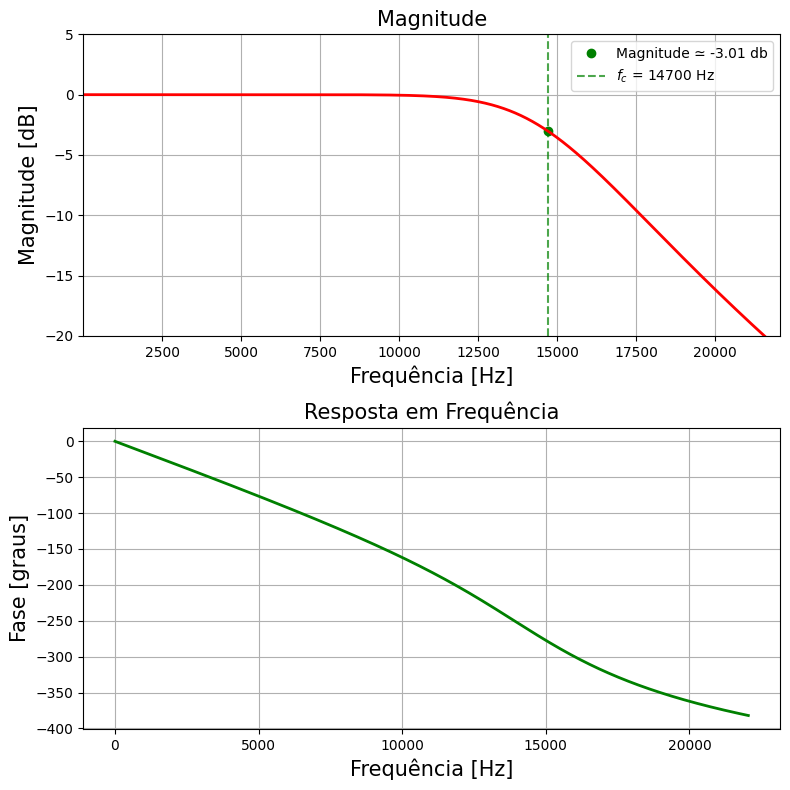

In [350]:
value_at_fc = analog_mag[round(fc / (freq[1] - freq[0]))]
print(f"Amplitude na frequência de corte: {value_at_fc} dB")


# Plot magnitude
fig = plt.figure(figsize=(8, 8))
sub1 = plt.subplot(2, 1, 1)
sub1.plot(fc, value_at_fc, "go", label=f"Magnitude ≃ {round(value_at_fc, 2)} db")
plt.axvline(
    x=fc, color="green", ls="--", label="$f_c$ = {} Hz".format(round(fc)), alpha=0.7
)
sub1.plot(freq, analog_mag, "r", linewidth=2)
sub1.axis([1, fs / 2, -20, 5])
sub1.set_title("Magnitude", fontsize=15)
sub1.set_xlabel("Frequência [Hz]", fontsize=15)
sub1.set_ylabel("Magnitude [dB]", fontsize=15)
plt.legend()
sub1.grid()


# Plot phase angle
sub2 = plt.subplot(2, 1, 2)

# Calculate phase angle in degree from hz
Phase = np.unwrap(np.angle(hs)) * 180 / np.pi
sub2.plot(freq, Phase, "g", linewidth=2)
sub2.set_ylabel("Fase [graus]", fontsize=15)
sub2.set_xlabel(r"Frequência [Hz]", fontsize=15)
sub2.set_title(r"Resposta em Frequência", fontsize=15)
sub2.grid()

plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
plt.show()

Amplitude na frequência de corte: -26.234189751596514 dB


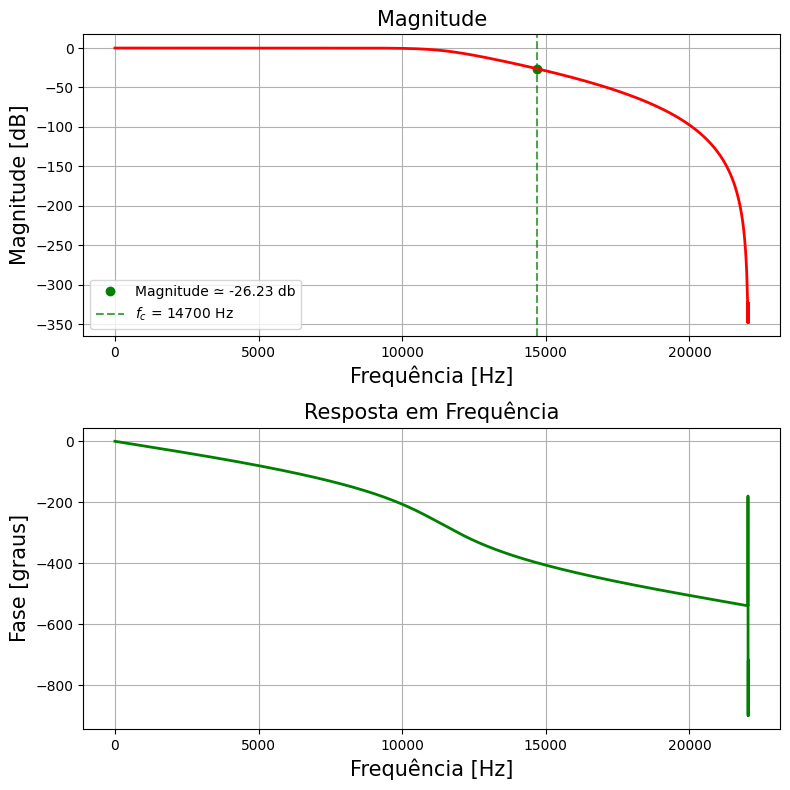

In [351]:
value_at_fc = discreet_mag[round(fc / (freq[1] - freq[0]))]
print(f"Amplitude na frequência de corte: {value_at_fc} dB")

# Plot magnitude
fig = plt.figure(figsize=(8, 8))
sub1 = plt.subplot(2, 1, 1)
sub1.plot(fc, value_at_fc, "go", label=f"Magnitude ≃ {round(value_at_fc, 2)} db")
plt.axvline(
    x=fc, color="green", ls="--", label="$f_c$ = {} Hz".format(round(fc)), alpha=0.7
)
plt.legend()
sub1.plot(freq, discreet_mag, "r", linewidth=2)
# sub1.axis([1, fs/2, -100, 10])
sub1.set_title("Magnitude", fontsize=15)
sub1.set_xlabel("Frequência [Hz]", fontsize=15)
sub1.set_ylabel("Magnitude [dB]", fontsize=15)
sub1.grid()

# Plot phase angle
sub2 = plt.subplot(2, 1, 2)

# Calculate phase angle in degree from hz
Phase = np.unwrap(np.angle(hz)) * 180 / np.pi
sub2.plot(freq, Phase, "g", linewidth=2)
sub2.set_ylabel("Fase [graus]", fontsize=15)
sub2.set_xlabel(r"Frequência [Hz]", fontsize=15)
sub2.set_title(r"Resposta em Frequência", fontsize=15)
sub2.grid()

plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
plt.show()

### 1. Sinal de Entrada

É interessante conhecermos graficamente os aspectos relacionados ao sinal de entrada tais como sua waveform, resposta em frequência e espectograma. 

#### 1.1. Waveform

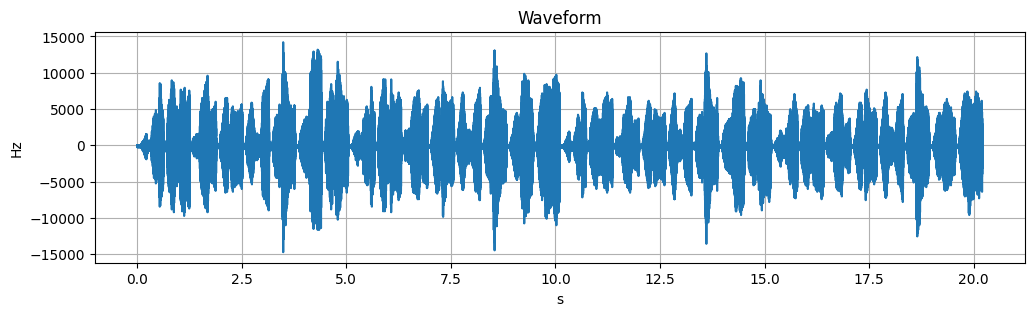

In [352]:
# Faz a leitura do arquivo de áudio e coleta a taxa de amostragem e os dados
(sample_rate, samples) = read('flute.wav')

# Tamanho do sinal
signal_length = len(samples)

# Período de amostragem do sinal entre 0 e signal_length
period = np.linspace(0, signal_length / sample_rate, signal_length)

# Plota o gráfico do sinal de entrada
plt.figure(figsize=(12, 3))
plt.plot(period, samples)
plt.title('Waveform')
plt.xlabel('s')
plt.ylabel('Hz')
plt.grid(True)
plt.show()

# Exibe o player de audio
Audio('flute.wav')



#### 1.2. Resposta em Frequência

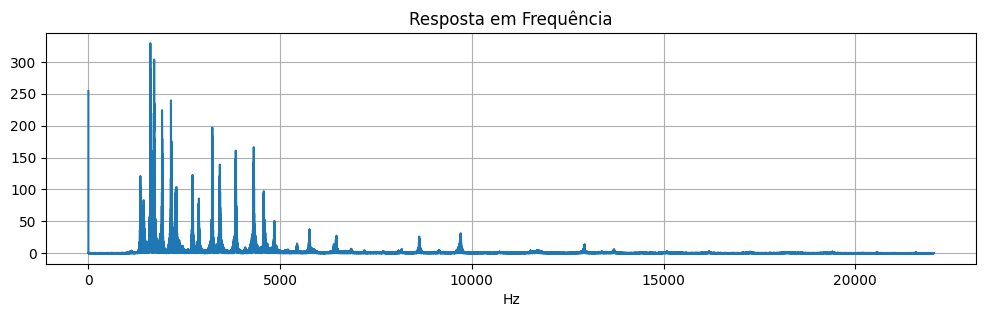

In [353]:
# Vetor contendo os coeficientes da transformada de fourier do sinal
samples_fft = fft(samples)[:signal_length//2]
magnitude_fft = np.abs(samples_fft)[:signal_length//2]

# frequências positivas correspondentes aos coeficientes da transformada de Fourier do sinal de áudio. 
# Essas frequências são calculadas com base no tamanho do sinal e na frequência de amostragem.
frequency_fft = fftfreq(signal_length, T)[:signal_length//2]

# Plota o gráfico da resposta em frequência do sinal de entrada
plt.figure(figsize=(12, 3))
plt.plot(frequency_fft, (2.0/signal_length) * magnitude_fft)
plt.title('Resposta em Frequência')
plt.xlabel('Hz')
plt.grid(True)
plt.show()


#### 1.3. Espectograma

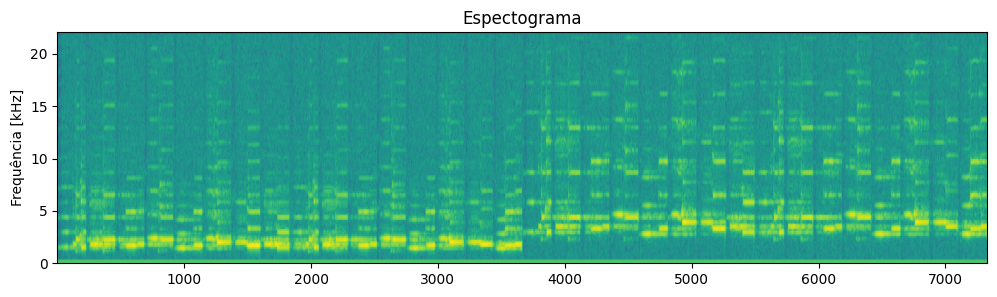

In [354]:
plt.figure(figsize=(12, 3))
plt.specgram(samples, Fs=fs/1000, sides='onesided')
plt.title('Espectograma')
plt.ylabel('Frequência [kHz]')
plt.show()

### 2. Butterworth

#### 2.1. Especificações do projeto de filtro

In [355]:
# Frequência de corte [rad/amostra]
Wc = 2 * np.pi / 3

# Frequência de amostragem [Hz]
Fs = 44100

# Frequência de corte [Hz]
Fc = round(Fs * Wc / (2 * np.pi))

# Ordem do filtro Butterworth
N = 6

#### 2.2. Implementação do filtro

In [356]:
# Criação do filtro Butterworth
b, a = signal.butter(N, Wc * Fs, btype='lowpass', analog=True, output='ba')

# Filtro Butterworth analógico e discreto por transformação bilinear
butterworth_analog = signal.lti(b, a)
butterworth_discrete = signal.dlti(*signal.bilinear(b, a, fs=Fs))

# Resposta em frequência do filtro Butterworth
Wz, Hz = signal.freqz(butterworth_discrete.num, butterworth_discrete.den, worN=Fs)
Ws, Hs = signal.freqs(butterworth_analog.num, butterworth_analog.den, worN=Fs * Wz)

#### 2.3. Resposta em frequência

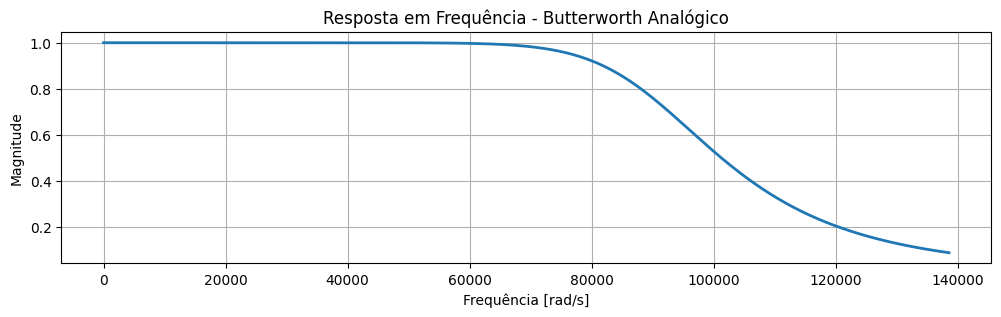

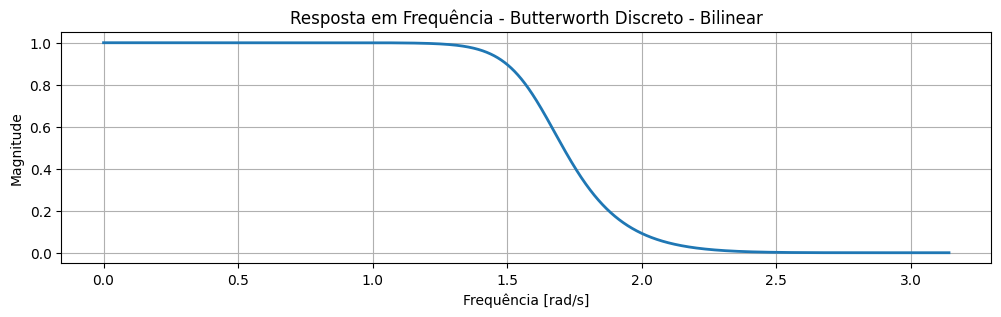

In [361]:
# Plota o gráfico de resposta em frequência do filtro Butterworth analógico
plt.figure(figsize=(12, 3))
plt.plot(Ws, np.abs(Hs), linewidth=2)
plt.title('Resposta em Frequência - Butterworth Analógico')
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

# Plota o gráfico de resposta em frequência do filtro Butterworth discreto
plt.figure(figsize=(12, 3))
plt.plot(Wz, np.abs(Hz), linewidth=2)
plt.title('Resposta em Frequência - Butterworth Discreto - Bilinear')
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


#### 2.4. Diagrama de polos e zeros

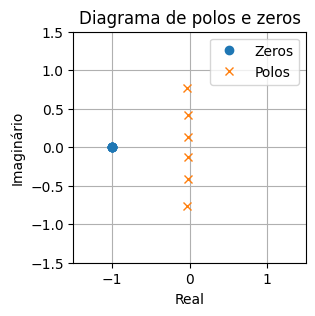

In [358]:
# Plota o diagrama de polos e zeros
plt.figure(figsize=(3, 3))
plt.plot(butterworth_discrete.zeros.real, butterworth_discrete.zeros.imag, 'o', label='Zeros')
plt.plot(butterworth_discrete.poles.real, butterworth_discrete.poles.imag, 'x', label='Polos')
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.legend()
plt.title("Diagrama de polos e zeros")
plt.xlabel("Real")
plt.ylabel("Imaginário")
plt.grid(True)
plt.show()

#### 2.5. Magnitude

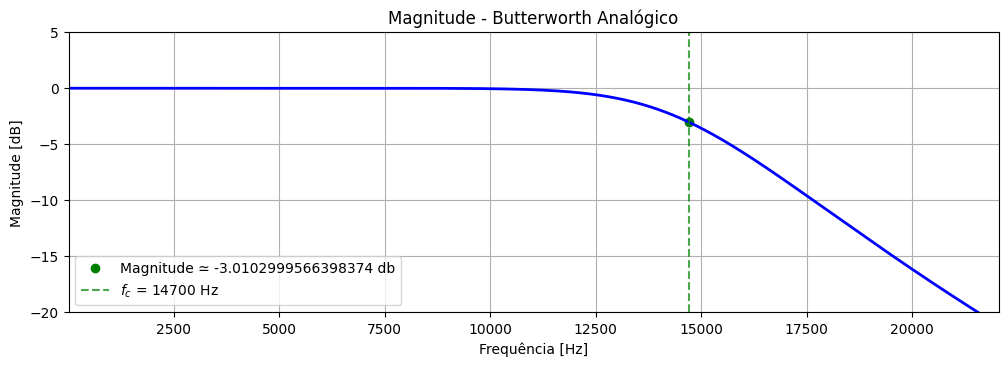

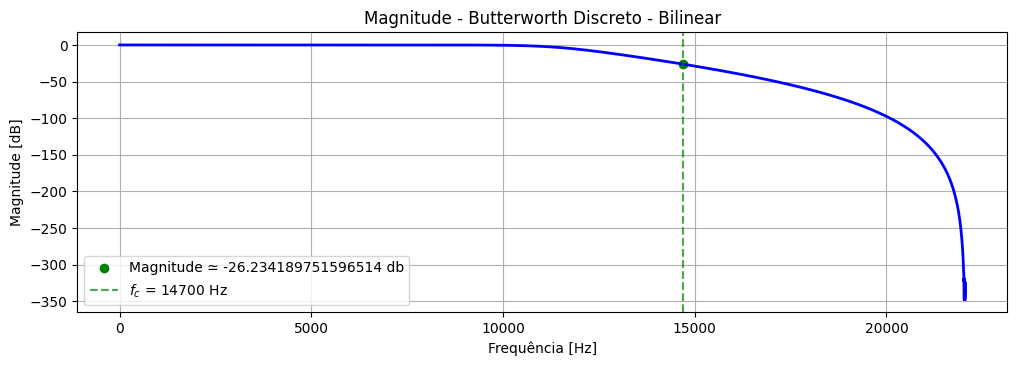

In [359]:
# Calcula a magnitude do filtro analógico e discreto em dB
butterworth_analog_magnitude = 20 * np.log10(abs(Hs))
butterworth_discrete_magnitude = 20 * np.log10(abs(Hz))

# Calcula a frequência do filtro discreto em Hz
Wz_frequency = Wz * Fs / (2 * np.pi)

# Magnitude na frequência de corte
Fc_analog_magnitude = butterworth_analog_magnitude[round(Fc / (Wz_frequency[1] - Wz_frequency[0]))]
Fc_discrete_magnitude = butterworth_discrete_magnitude[round(Fc / (Wz_frequency[1] - Wz_frequency[0]))]

# Plota o gráfico de Magnitude para Butterworth Analógico
plt.figure(figsize=(12, 8))
subplot = plt.subplot(2, 1, 1)
subplot.plot(Fc, Fc_analog_magnitude, 'go', label=f"Magnitude ≃ {Fc_analog_magnitude} db")
subplot.plot(Wz_frequency, butterworth_analog_magnitude, 'b', linewidth=2)
subplot.axis([1, fs / 2, -20, 5])
subplot.set_title("Magnitude - Butterworth Analógico")
subplot.set_xlabel("Frequência [Hz]")
subplot.set_ylabel("Magnitude [dB]")
subplot.grid()
plt.axvline(x=Fc, color="green", ls="--", label="$f_c$ = {} Hz".format(round(Fc)), alpha=0.7)
plt.legend()
plt.show()

# Plota o gráfico de Magnitude para Butterworth Discreto
plt.figure(figsize=(12, 8))
subplot = plt.subplot(2, 1, 1)
subplot.plot(Fc, Fc_discrete_magnitude, 'go', label=f"Magnitude ≃ {Fc_discrete_magnitude} db")
subplot.plot(Wz_frequency, butterworth_discrete_magnitude, 'b', linewidth=2)
subplot.set_title("Magnitude - Butterworth Discreto - Bilinear")
subplot.set_xlabel("Frequência [Hz]")
subplot.set_ylabel("Magnitude [dB]")
subplot.grid()
plt.axvline(x=Fc, color="green", ls="--", label="$f_c$ = {} Hz".format(round(Fc)), alpha=0.7)
plt.legend()
plt.show()

### 3. Filtragem

#### 3.1. Cascata

##### 3.1.1. Precição infinita

##### 3.1.2. Precição finita de 5 casas decimais

##### 3.1.3. Precição finita de 3 casas decimais

#### 3.2. Direta

##### 3.2.1. Precisão infinita

##### 3.2.2. Precição finita de 5 casas decimais

##### 3.2.3. Precição finita de 3 casas decimais

##### 3.2.4. Transformação $Z^{-1} = -z^{-1}$

##### 3.2.4. Transformação $Z^{-1} = z^{-2}$

##### 3.2.6. Transformação $Z^{-1} = -z^{-2}$